# Health Hackathon

Le but de ce hackathon est de tenter de vérifier s'il existe:
- un lien entre la densité de médecins par spécialité et territoire et la pratique du dépassement d'honoraires
- une corrélation entre certaines classes d'âges et la densité de médecins, etc

In [1]:
# Necessary packages import
%matplotlib inline
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import seaborn as sns
from pandas.tools.plotting import radviz, scatter_matrix

## Densité de médecins par spécialité et territoire

In [2]:
# Chargement des données (issues de Etalab pour la densité de médecins par région) dans une DataFrame
df = pd.read_csv('DensiteMedecins.csv', sep=',', encoding='utf-8')

In [3]:
# Taille de df (avant modification)
df.shape

(57640, 5)

In [4]:
# Affichage des 5 premières lignes
df.head(5)

,mode_exercice,zone_inscription,annee,specialite,effectifs
0,Ensemble des modes d'exercice,FRANCE ENTIERE,2014,Ensemble des spécialités d'exercice,219834
1,Ensemble des modes d'exercice,FRANCE ENTIERE,2014,Spécialistes,117694
2,Ensemble des modes d'exercice,FRANCE ENTIERE,2014,Anatomie et cytologie pathologiques,1566
3,Ensemble des modes d'exercice,FRANCE ENTIERE,2014,Anesthésie-réanimation,10949
4,Ensemble des modes d'exercice,FRANCE ENTIERE,2014,Biologie médicale,2662


In [5]:
# Extraction des différents mode d'exercice
df['mode_exercice'].unique()

array(["Ensemble des modes d'exercice", 'Libéraux exclusifs', 'Mixtes',
       'Salariés Hospitaliers', 'Autres Salariés'], dtype=object)

In [6]:
# Selection des lignes correspondant à l'ensemble des modes d'exercice uniquement
df = df[df['mode_exercice'] == "Ensemble des modes d'exercice"]
df['mode_exercice'].unique()

array(["Ensemble des modes d'exercice"], dtype=object)

In [7]:
# Différentes années traitées
df['annee'].unique()

array([2014, 2013])

In [8]:
# Selection des lignes correspondant à l'année 2014 uniquement
df = df[df['annee'] == 2014]
df.annee.unique()

array([2014])

In [9]:
# Taille df (apres modification)
df.shape

(5764, 5)

In [10]:
# Selection par département (zone d'inscription commencant par une lettre majuscule puis une lettre minuscule)
# regEx = "^[A-Z][a-z]"
regEx = "^[\d+]"
# df = dfdf["zone_inscription"].str.match(regEx)]
df = df[df["zone_inscription"].str.contains(regEx)]
# df.zone_inscription.unique()

In [11]:
df.zone_inscription = df.zone_inscription.apply(lambda x: "-".join(x.split("-")[1:]))
df.zone_inscription.str.replace("\u0092", "'").replace("\xa0", "")
df.zone_inscription = df.zone_inscription.str.replace("\u0092", "'").str.replace("\xa0", "").str.strip()

In [12]:
print("Nombre de départements considérés: {} \n".format(len(df.zone_inscription.unique())))
print((df.zone_inscription.unique()))
df.head(5)

Nombre de départements considérés: 101 

['Ain' 'Aisne' 'Allier' 'Alpes-de-Haute-Provence' 'Hautes-Alpes'
 'Alpes-Maritimes' 'Ardèche' 'Ardennes' 'Ariège' 'Aube' 'Aude' 'Aveyron'
 'Bouches-du-Rhône' 'Calvados' 'Cantal' 'Charente' 'Charente-Maritime'
 'Cher' 'Corrèze' 'Corse-du-Sud' 'Haute-Corse' "Côte-d'Or" "Côtes-d'Armor"
 'Creuse' 'Dordogne' 'Doubs' 'Drôme' 'Eure' 'Eure-et-Loir' 'Finistère'
 'Gard' 'Haute-Garonne' 'Gers' 'Gironde' 'Hérault' 'Ille-et-Vilaine'
 'Indre' 'Indre-et-Loire' 'Isère' 'Jura' 'Landes' 'Loir-et-Cher' 'Loire'
 'Haute-Loire' 'Loire-Atlantique' 'Loiret' 'Lot' 'Lot-et-Garonne' 'Lozère'
 'Maine-et-Loire' 'Manche' 'Marne' 'Haute-Marne' 'Mayenne'
 'Meurthe-et-Moselle' 'Meuse' 'Morbihan' 'Moselle' 'Nièvre' 'Nord' 'Oise'
 'Orne' 'Nord-Pas-de-Calais' 'Puy-de-Dôme' 'Pyrénées-Atlantiques'
 'Hautes-Pyrénées' 'Pyrénées-Orientales' 'Bas-Rhin' 'Haut-Rhin' 'Rhône'
 'Haute-Saône' 'Saône-et-Loire' 'Sarthe' 'Savoie' 'Haute-Savoie' 'Paris'
 'Seine-Maritime' 'Seine-et-Marne' 'Yveline

,mode_exercice,zone_inscription,annee,specialite,effectifs
2640,Ensemble des modes d'exercice,Ain,2014,Ensemble des spécialités d'exercice,1203
2641,Ensemble des modes d'exercice,Ain,2014,Spécialistes,509
2642,Ensemble des modes d'exercice,Ain,2014,Anatomie et cytologie pathologiques,3
2643,Ensemble des modes d'exercice,Ain,2014,Anesthésie-réanimation,33
2644,Ensemble des modes d'exercice,Ain,2014,Biologie médicale,9


In [13]:
# Regroupement des métiers (Généralistes, Spécialistes)
df = df[df.specialite.isin(["Généralistes", "Spécialistes"])]
densiteMedecins = df.groupby("zone_inscription").effectifs.sum()
dfDensiteMedecins = DataFrame(densiteMedecins).rename(columns={"effectifs": "Medecins"})
dfDensiteMedecins.index.name = "Departement"

# Généralistes          
dfGeneralistes = df[df.specialite.isin(["Généralistes"])]
densiteGeneralistes = dfGeneralistes.groupby("zone_inscription").effectifs.sum()
dfDensiteGeneralistes = DataFrame(densiteGeneralistes).rename(columns={"effectifs": "Generalistes"})
dfDensiteGeneralistes.index.name = "Departement"
                    
# Spécialistes
dfSpecialistes = df[df.specialite.isin(["Spécialistes"])]
densiteSpecialistes = dfSpecialistes.groupby("zone_inscription").effectifs.sum()    
dfDensiteSpecialistes = DataFrame(densiteSpecialistes).rename(columns={"effectifs": "Specialistes"})
dfDensiteSpecialistes.index.name = "Departement"                    

In [14]:
dfDensiteMedecinRes = pd.concat([dfDensiteMedecins, dfDensiteGeneralistes, dfDensiteSpecialistes], axis=1)
dfDensiteMedecinRes

,Medecins,Generalistes,Specialistes
Departement,,,
Ain,1203,694,509
Aisne,1235,626,609
Allier,966,506,460
Alpes-Maritimes,4889,2051,2838
Alpes-de-Haute-Provence,485,293,192
Ardennes,655,382,273
Ardèche,790,415,375
Ariège,439,271,168
Aube,734,379,355


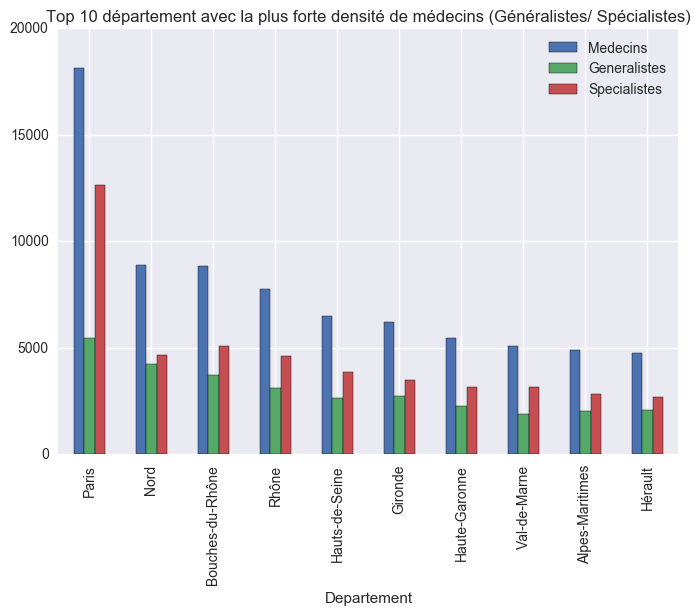

In [15]:
# Histogramme représentant les top 10 départements avec la plus grande densité de médecins (généralistes + spécialistes)
top_departements = 10
densiteMedecinsSorted = dfDensiteMedecinRes.sort_values(by="Medecins", ascending=False)
densiteMedecinsSorted.ix[:top_departements].plot.bar(title="Top 10 département avec la plus forte densité de médecins (Généralistes/ Spécialistes)")  # Top 10 départements avec la plus grande densité de médecins

## Densité de population par département

In [16]:
# Population par département et tranche d'âge (année 2014, source: INSEE)
table = pd.read_excel("popDepAge.xls", sheetname = 1, skiprows= [0, 1, 2, 3], encode = 'utf-8')
table = table[['Unnamed: 1', 'Total.2']].dropna()
table.columns = ['Département', 'Population']
table.Département = table.Département.str.strip()
table.Département = table.Département.apply(lambda x: "Nord-Pas-de-Calais" if(x == "Pas-de-Calais") else x)
table.Population = table.Population.astype(int)
table = table.set_index("Département")
print(table)

                         Population
Département                        
Ain                          316760
Aisne                        277300
Allier                       177973
Alpes-de-Haute-Provence       83599
Hautes-Alpes                  72957
Alpes-Maritimes              568112
Ardèche                      164938
Ardennes                     144196
Ariège                        78140
Aube                         157780
Aude                         190780
Aveyron                      140131
Bouches-du-Rhône            1040612
Calvados                     357807
Cantal                        75446
Charente                     182690
Charente-Maritime            330196
Cher                         160360
Corrèze                      123539
Corse-du-Sud                  76367
Haute-Corse                   88536
Côte-d'Or                    272573
Côtes-d'Armor                309317
Creuse                        61747
Dordogne                     217049
Doubs                       

In [17]:
# Mayotte is not present in the second dataset
print(set(dfDensiteMedecins.index.unique()) - set(table.index.unique()))

{'Mayotte'}


In [18]:
# After removing row corresponding to department Mayotte
# dfDensiteMedecins = dfDensiteMedecins.drop(["Mayotte"])
print(set(dfDensiteMedecins.index.unique()) - set(table.index.unique()))

{'Mayotte'}


In [19]:
table.sort_values(by="Population", ascending=False)
# Top 10 départements en terme de population
topDepartementPop = table.ix[:10]

In [20]:
# Merge (sur le départment) entre dfDensiteMedecins et table 
resultingDf = pd.merge(left=dfDensiteMedecinRes, right=table, how="inner", left_index=True, right_index=True)
resultingDf.index.name = "Département"

In [21]:
# Détermination du ratio médecin/population total par département
resultingDf['Ratio(%)'] = resultingDf.apply(lambda x: x.Medecins / x.Population * 100, axis=1)
# Catégirisation en 4 type de densité dépendant du rapport (Medecins/Population)
categories = pd.qcut(resultingDf["Ratio(%)"], 4, labels=["--","-","+","++"])
resultingDf["Densité"] = categories
print(resultingDf.head(5))

                         Medecins  Generalistes  Specialistes  Population  \
Département                                                                 
Ain                          1203           694           509      316760   
Aisne                        1235           626           609      277300   
Allier                        966           506           460      177973   
Alpes-de-Haute-Provence       485           293           192       83599   
Hautes-Alpes                  573           321           252       72957   

                         Ratio(%) Densité  
Département                                
Ain                      0.379783      --  
Aisne                    0.445366      --  
Allier                   0.542779       -  
Alpes-de-Haute-Provence  0.580150       +  
Hautes-Alpes             0.785394      ++  


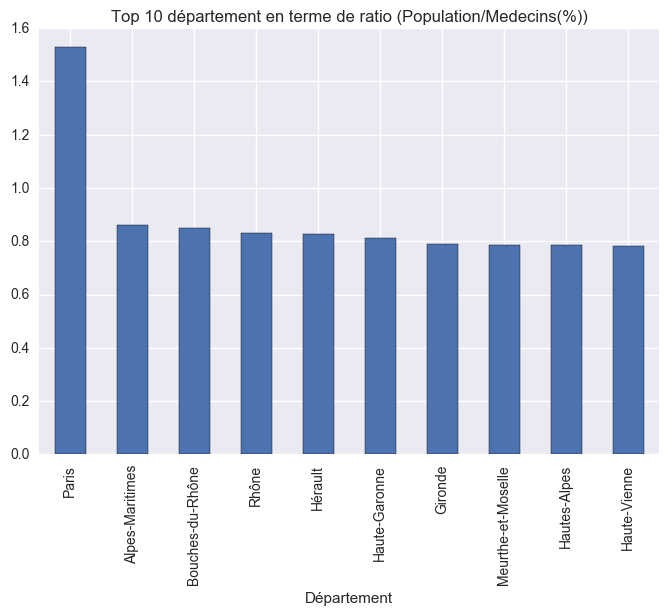

In [22]:
# Top 10 départements 
sortedResultingDf = resultingDf.sort_values(by="Ratio(%)", ascending=False)[:10]
sortedResultingDf["Ratio(%)"].plot.bar(title="Top 10 département en terme de ratio (Population/Medecins(%))", )

## Dépassement d'honoraires par département

In [23]:
# Fichier honoraires trouvé sur AMELI (année 2014)
data = pd.read_excel("Honoraires2014.xls", sheetname=[1, 2, 3, 4, 5, 6])

In [24]:
# Sheet des spécialistes
df = data[2]
# Supprimer lignes contenant des na
df = df.replace('nc', np.nan).dropna()
# Supprimer les lignes avec effecitif = 0
df= df[df['EFFECTIFS'] > 0]

                    DEPASSEMENTS (Euros)  TOTAL DES HONORAIRES (Euros)
DEPARTEMENT                                                           
Ain                           13382143.0                  1.275610e+08
Aisne                          5728789.0                  1.453298e+08
Allier                         6450730.0                  1.075800e+08
Alpes-Hte-Provence             2624229.0                  4.993862e+07
Hautes-Alpes                   1057771.0                  4.048806e+07
Alpes-Maritimes               97645685.0                  5.722508e+08
Ardèche                        8761979.0                  8.955529e+07
Ardennes                       1315061.0                  6.692853e+07
Ariège                          640831.0                  3.404749e+07
Aube                           7502902.0                  8.745800e+07
Aude                           4324056.0                  1.218953e+08
Aveyron                        2100480.0                  6.449872e+07
Bouche

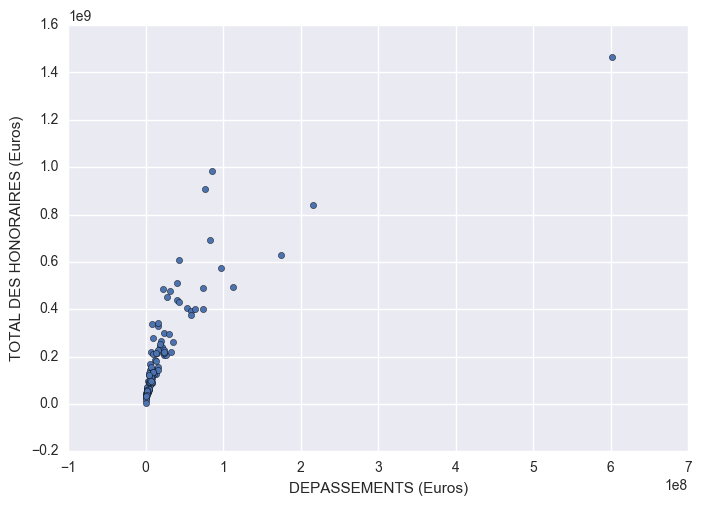

In [25]:
# Médecins en général (Spécialistes + Généralistes)
dfMed = df[df['Spécialistes'].str.contains('TOTAL MEDECINS')== True]
dfMed = dfMed[["DEPARTEMENT", "DEPASSEMENTS (Euros)", "TOTAL DES HONORAIRES (Euros)"]]
pattern = "^[\d+]"
dfMed = dfMed[dfMed.DEPARTEMENT.str.contains(pattern)]
dfMed.DEPARTEMENT = dfMed.DEPARTEMENT.apply(lambda x: x.split("- ")[1])
dfMed = dfMed.set_index("DEPARTEMENT")

print(dfMed)

dfMed.plot.scatter("DEPASSEMENTS (Euros)", "TOTAL DES HONORAIRES (Euros)")

                    DEPASSEMENTS (Euros)  TOTAL DES HONORAIRES (Euros)
DEPARTEMENT                                                           
Ain                           12283070.0                  6.515420e+07
Aisne                          4643228.0                  7.242137e+07
Allier                         6132710.0                  6.185132e+07
Alpes-Hte-Provence             2100632.0                  2.232213e+07
Hautes-Alpes                    671152.0                  1.920323e+07
Alpes-Maritimes               87497183.0                  4.031913e+08
Ardèche                        8197017.0                  4.819734e+07
Ardennes                       1066483.0                  2.485280e+07
Ariège                          587234.0                  1.064864e+07
Aube                           7043095.0                  4.835851e+07
Aude                           3948336.0                  6.606911e+07
Aveyron                        1768631.0                  2.655916e+07
Bouche

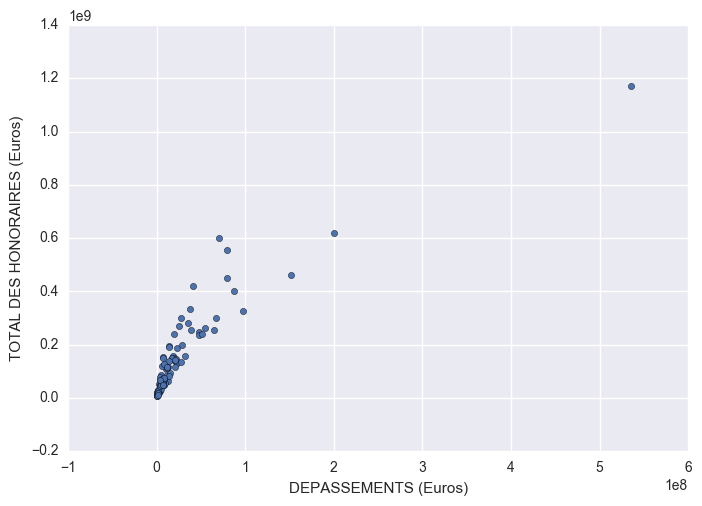

In [26]:
# Spécialistes
dfSpe = df[df['Spécialistes'].str.contains('TOTAL SPECIALISTES') == True]
dfSpe = dfSpe[["DEPARTEMENT", "DEPASSEMENTS (Euros)", "TOTAL DES HONORAIRES (Euros)"]]
pattern = "^[\d+]"
dfSpe = dfSpe[dfSpe.DEPARTEMENT.str.contains(pattern)]
dfSpe.DEPARTEMENT = dfSpe.DEPARTEMENT.apply(lambda x: x.split("- ")[1])
dfSpe = dfSpe.set_index("DEPARTEMENT")
print(dfSpe)

dfSpe.plot.scatter("DEPASSEMENTS (Euros)", "TOTAL DES HONORAIRES (Euros)")

                      DEPASSEMENTS (Euros)  TOTAL DES HONORAIRES (Euros)
DEPARTEMENT                                                             
Ain                              1099073.0                    62406814.0
Aisne                            1085561.0                    72908376.0
Allier                            318020.0                    45728700.0
Alpes-Hte-Provence                523597.0                    27616491.0
Alpes-Maritimes                 10148502.0                   169059482.0
Ardennes                          248578.0                    42075730.0
Ardèche                           564962.0                    41357956.0
Ariège                             53597.0                    23398849.0
Aube                              459807.0                    39099489.0
Aude                              375720.0                    55826241.0
Aveyron                           331849.0                    37939569.0
Bas-Rhin                         6850867.0         

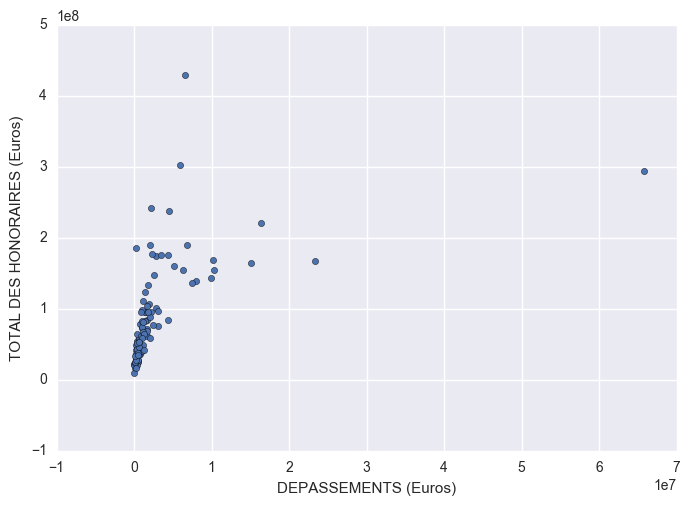

In [29]:
# Généralistes
dfGen = dfMed - dfSpe 
dfGen = dfGen.dropna()

print(dfGen)

dfGen.plot.scatter("DEPASSEMENTS (Euros)", "TOTAL DES HONORAIRES (Euros)")